In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data\Kickstarter_projects_Feb19.csv')
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


## Remove duplicates and null values 

In [5]:
# The dataset content duplicated datas.
print (df.duplicated().value_counts())

False    170730
True      21818
dtype: int64


In [6]:
# Duplicated datas dropped and 170730 entries remain.
# With no null values
df.drop_duplicates(keep='first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170730 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             170730 non-null  int64  
 1   name           170730 non-null  object 
 2   currency       170730 non-null  object 
 3   main_category  170730 non-null  object 
 4   sub_category   170730 non-null  object 
 5   launched_at    170730 non-null  object 
 6   deadline       170730 non-null  object 
 7   duration       170730 non-null  float64
 8   goal_usd       170730 non-null  float64
 9   city           170730 non-null  object 
 10  state          170730 non-null  object 
 11  country        170730 non-null  object 
 12  blurb_length   170730 non-null  int64  
 13  name_length    170730 non-null  int64  
 14  status         170730 non-null  object 
 15  start_month    170730 non-null  int64  
 16  end_month      170730 non-null  int64  
 17  start_Q        170730 non-nul

## Target variables

In [7]:
# Classification model - predict whether the model will be successfully funded
# looking on the relationship with 'main_cat', 'duration', 'goal set', 'start month'
print (df['status'].unique())
print (df['status'].isnull().value_counts())

['successful' 'failed']
False    170730
Name: status, dtype: int64


In [8]:
# Regression model - predict how much the reviewers value the project 
# looking on the relationship with 'main_cat', 'duration', 'start month'
df['usd_pledged'].isnull().value_counts()

False    170730
Name: usd_pledged, dtype: int64

## Independent variables 

In [47]:
df['sub_category'].value_counts().count()

159

In [48]:
## Remove column of 'city' and 'state' as data are imbalanced.
print (df['city'].value_counts()) 
print (df['state'].value_counts())
print (df['country'].value_counts())

Los Angeles      7946
London           6472
New York         6390
Chicago          3208
San Francisco    2773
                 ... 
Texhoma             1
Holmestrand         1
El Ejido            1
Glen Innes          1
Portmore            1
Name: city, Length: 12334, dtype: int64
CA                 22258
England            16045
NY                 14027
TX                  7006
FL                  5800
                   ...  
RÃÂ­o San Juan        1
Constantine            1
Leeward Islands        1
Salta                  1
Carabobo               1
Name: state, Length: 1123, dtype: int64
US    122286
GB     18781
CA      7936
AU      3965
DE      2669
FR      2078
IT      1835
MX      1823
NL      1483
ES      1474
SE      1147
NZ       763
DK       739
HK       675
CH       526
IE       513
SG       505
BE       448
NO       410
AT       388
JP       240
LU        46
Name: country, dtype: int64


## Univariate 

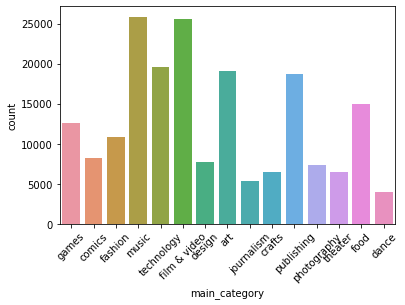

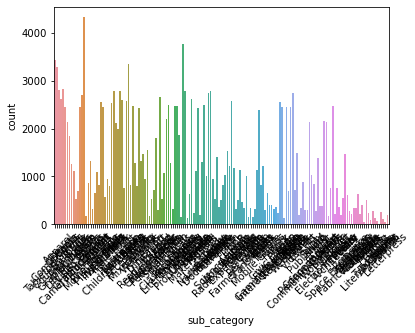

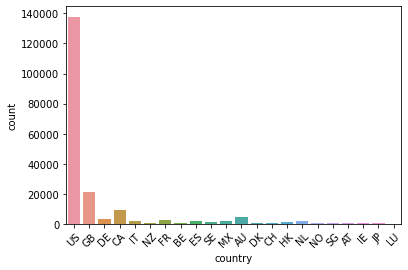

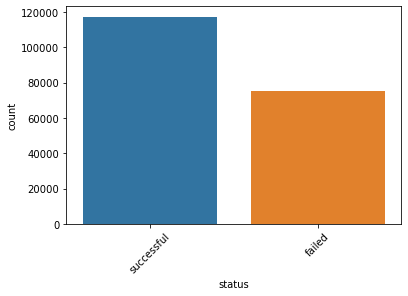

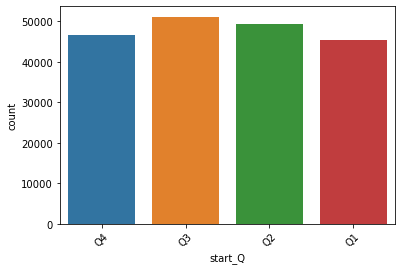

In [50]:
# countplot for main_category, country, status,start_Q, 'start month'
count = ['main_category','sub_category', 'country','status','start_Q','start_month']

for i in range(0,5):
    sns.countplot(data = df, x = count[i])
    plt.xticks (rotation = 45)
    plt.show()

<AxesSubplot:>

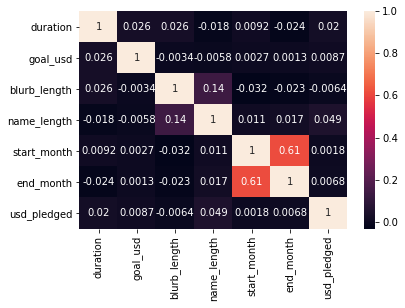

In [12]:
df_num = df[['duration','goal_usd','blurb_length','name_length','start_month','end_month','usd_pledged']]
sns.heatmap (df_num.corr(), annot = True)

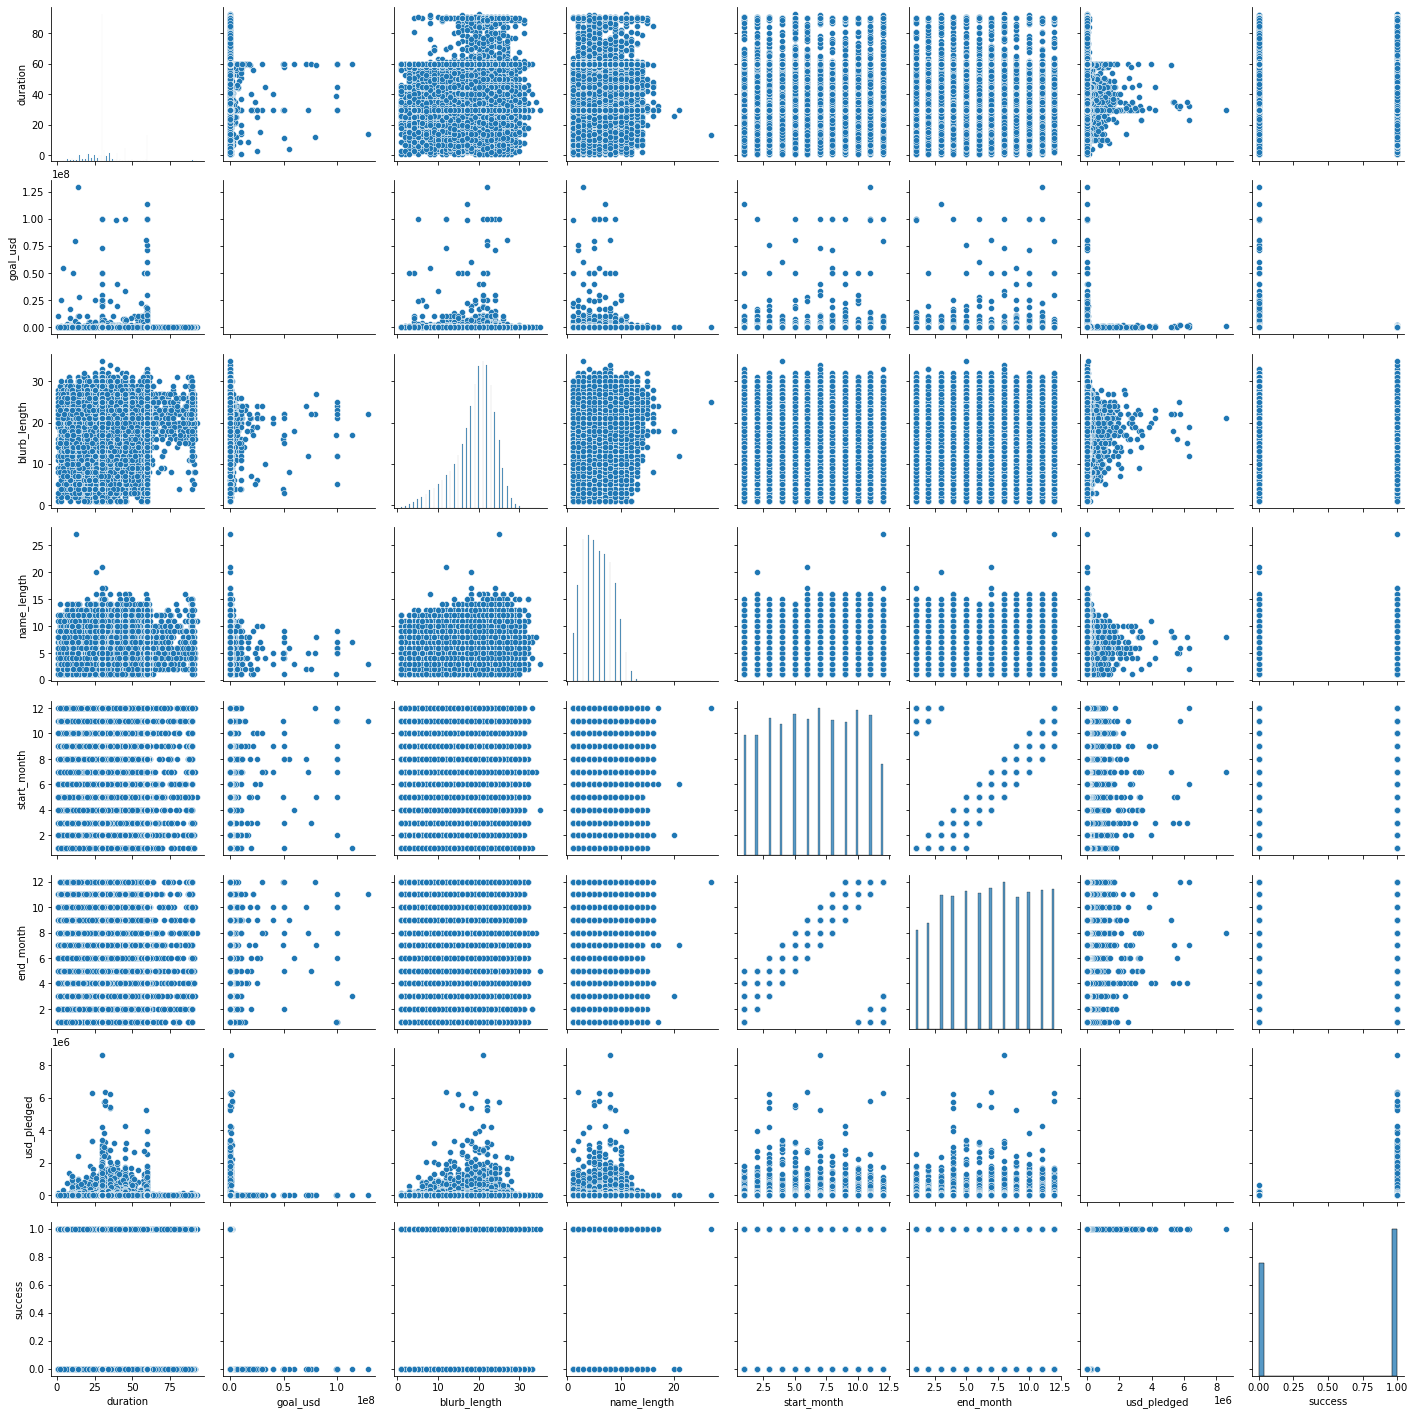

In [15]:
df_num_test = df[['duration','goal_usd','blurb_length','name_length','start_month','end_month','usd_pledged', 'success']]
sns.pairplot (df_num_test)

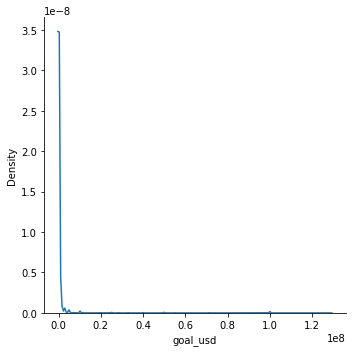

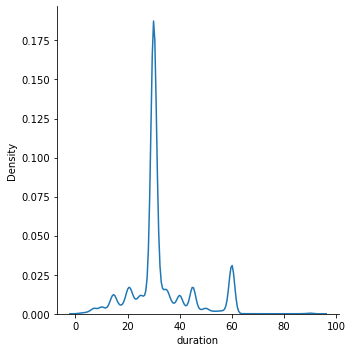

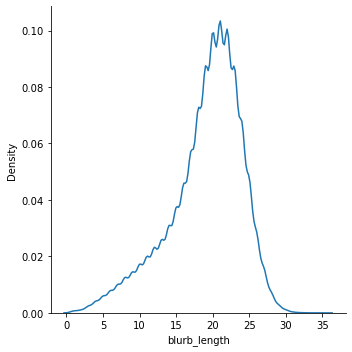

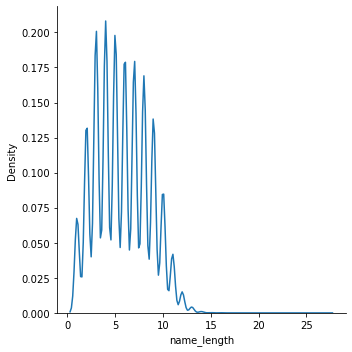

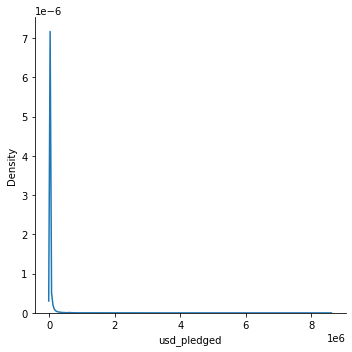

In [5]:
num_col = ['goal_usd','duration', 'blurb_length', 'name_length','usd_pledged']
for i in num_col:
    sns.displot(data = df, x = i, kind ='kde' )
    plt.show()

## Bivariate 

In [ ]:
# Changing 'launched_at' and 'deadline' to datetime for time series analysis 
df['launched_at'] = pd.to_datetime(df['launched_at'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['year'] = df['launched_at'].apply(lambda x: x.year)

Text(0.5, 1.0, 'Goal USD for Successful and Failed case 2009-2019')

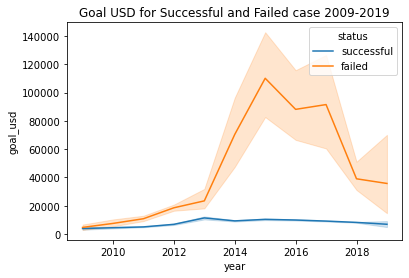

In [13]:
sns.lineplot(data = df, x='year', y='goal_usd',  estimator = 'mean', hue ='status' ).set_title('Goal USD for Successful and Failed case 2009-2019')

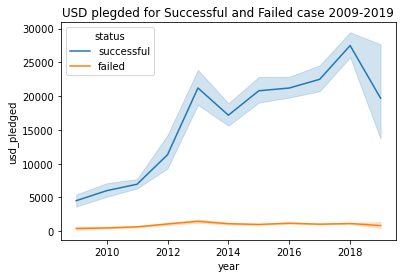

In [15]:
sns.lineplot(data = df, x='year', y='usd_pledged',  estimator = 'mean', hue ='status').set_title('USD plegded for Successful and Failed case 2009-2019')
plt.show()



### Goal USD and USD pledged for failed and successful cases   

Majority of the failed funding cases has a large gap between the targeted amount and actual amount of the funding. It shows that a unrealistic funding goal may be the cause of a failed funding case. 
Also, it is important to know predict how the public value the project to reach a more realistic goal.

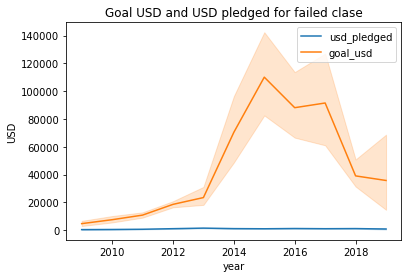

In [22]:
failed_case = df[df['status']=='failed']

sns.lineplot(data = failed_case, x='year', y='usd_pledged',legend= 'full').set_title('Goal USD and USD pledged for failed clase')
sns.lineplot(data = failed_case, x='year', y='goal_usd')
plt.legend(['usd_pledged','goal_usd'])
plt.ylabel("USD")
plt.show()

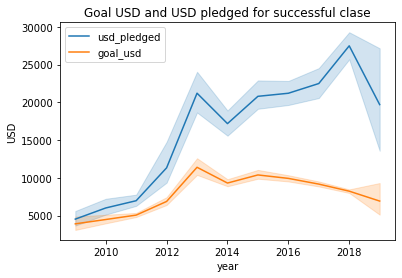

In [23]:
success_case = df[df['status']=='successful']

sns.lineplot(data = success_case, x='year', y='usd_pledged',legend= 'full').set_title('Goal USD and USD pledged for successful clase')
sns.lineplot(data = success_case, x='year', y='goal_usd')
plt.legend(['usd_pledged','goal_usd'])
plt.ylabel("USD")
plt.show()

### In terms of categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'games'),
  Text(1, 0, 'comics'),
  Text(2, 0, 'fashion'),
  Text(3, 0, 'music'),
  Text(4, 0, 'technology'),
  Text(5, 0, 'film & video'),
  Text(6, 0, 'design'),
  Text(7, 0, 'art'),
  Text(8, 0, 'journalism'),
  Text(9, 0, 'crafts'),
  Text(10, 0, 'publishing'),
  Text(11, 0, 'photography'),
  Text(12, 0, 'theater'),
  Text(13, 0, 'food'),
  Text(14, 0, 'dance')])

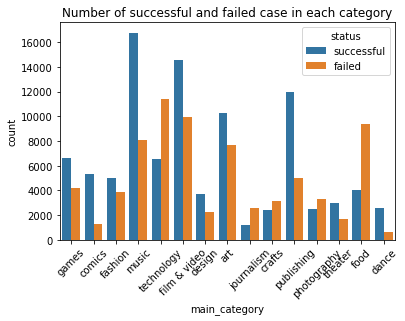

In [26]:
### Categories for successful and failed cases
sns.countplot(data = df, x= 'main_category', hue = 'status').set_title('Number of successful and failed case in each category')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'games'),
  Text(1, 0, 'comics'),
  Text(2, 0, 'fashion'),
  Text(3, 0, 'music'),
  Text(4, 0, 'technology'),
  Text(5, 0, 'film & video'),
  Text(6, 0, 'design'),
  Text(7, 0, 'art'),
  Text(8, 0, 'journalism'),
  Text(9, 0, 'crafts'),
  Text(10, 0, 'publishing'),
  Text(11, 0, 'photography'),
  Text(12, 0, 'theater'),
  Text(13, 0, 'food'),
  Text(14, 0, 'dance')])

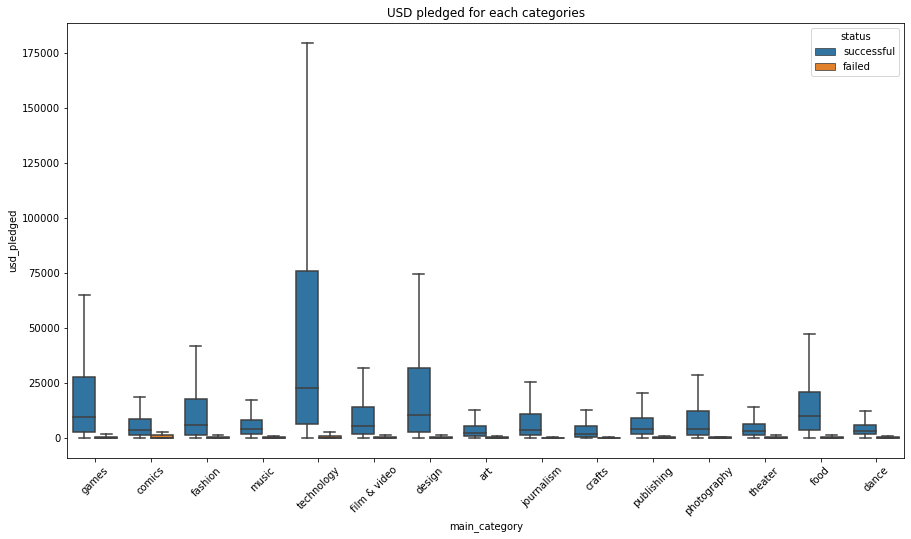

In [29]:
### USD pledged for successful and failed cases, remove outliners 
plt.figure(figsize=(15,8))
ax = sns.boxplot(data = df, x= 'main_category', y = 'usd_pledged', hue = 'status', showfliers = False).set_title('USD pledged for each categories')
plt.xticks(rotation=45)

### For Duration
Successful project normally needed half of the time to get enough funding. Not neccessary to have the max period of 60days for funding.

Text(0.5, 1.0, 'Project duration for successful and failed cases')

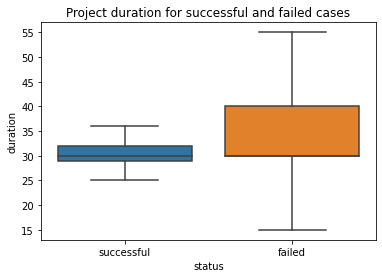

In [32]:
sns.boxplot(data = df, x= 'status', y = 'duration',showfliers = False).set_title('Project duration for successful and failed cases')

### For different countries 

Text(0.5, 1.0, 'Number of successful and failed case in each country')

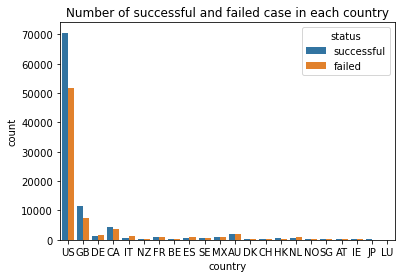

In [33]:
# Majority of the project based in US, imbalance data in terms of country. 
# Therefore, grouped the data to US based and Non-US based project to build the model  
sns.countplot(data = df, x= 'country', hue = 'status').set_title('Number of successful and failed case in each country')

Text(0.5, 1.0, 'Goal USD for projects in each country')

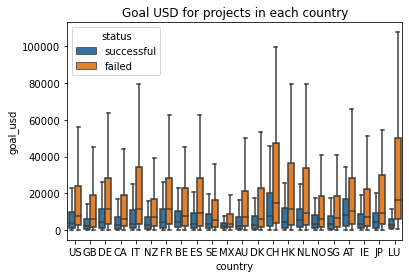

In [10]:
sns.boxplot(data = df, x= 'country', y = 'goal_usd', hue = 'status',showfliers = False).set_title('Goal USD for projects in each country')

Text(0.5, 1.0, 'USD pledged for projects in each country')

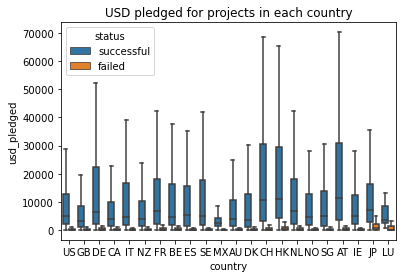

In [9]:
# Projects from CH, HK , AT or DE are getting more funding 
sns.boxplot(data = df, x= 'country', y = 'usd_pledged', hue = 'status',showfliers = False).set_title('USD pledged for projects in each country')

### Launching month 

Text(0.5, 1.0, 'Launching month of successful and failed case in each category')

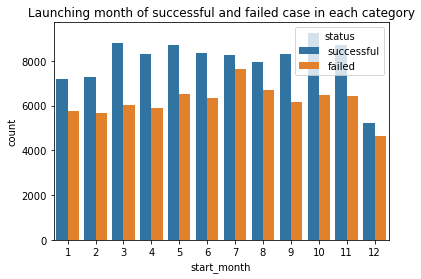

In [41]:
sns.countplot(data = df, x= 'start_month', hue = 'status').set_title('Launching month of successful and failed case in each category')

Text(0.5, 1.0, 'Goal USD in each month')

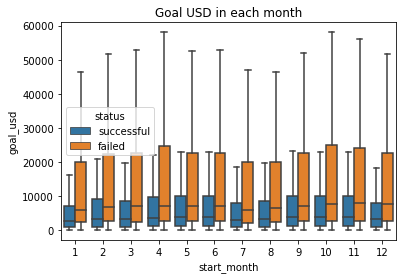

In [44]:
sns.boxplot(data = df, x= 'start_month', y = 'goal_usd', hue = 'status',showfliers = False).set_title('Goal USD in each month')

Text(0.5, 1.0, 'USD pledged in each month')

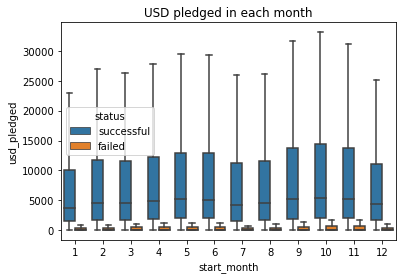

In [4]:
sns.boxplot(data = df, x= 'start_month', y = 'usd_pledged', hue = 'status',showfliers = False).set_title('USD pledged in each month')